# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [ ]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
import plotnine as p9

In [ ]:
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

Class Check-In 1

In [ ]:
males_under_20_who_survived = df_titanic[(df_titanic["age"] < 20) & (df_titanic["gender"] == "male")]
males_under_20_who_survived

,name,gender,age,class,embarked,country,ticketno,fare,survived
1,"Abbott, Mr. Eugene Joseph",male,13.000000,3rd,S,United States,2673.0,20.0500,0
2,"Abbott, Mr. Rossmore Edward",male,16.000000,3rd,S,United States,2673.0,20.0500,0
13,"Aks, Master. Frank Philip",male,0.833333,3rd,S,England,392091.0,9.0700,1
17,"Alhomäki, Mr. Ilmari Rudolf",male,19.000000,3rd,S,Finland,3101287.0,7.1806,0
22,"Allison, Master. Hudson Trevor",male,0.916667,1st,S,Canada,113781.0,151.1600,1
...,...,...,...,...,...,...,...,...,...
2138,"Villvarlange, Mr. Pierre Léon Gabriel",male,19.000000,restaurant staff,S,England,NaN,NaN,0
2139,"Vine, Mr. Herbert Thomas Gordon",male,18.000000,restaurant staff,S,England,NaN,NaN,0
2155,"Watson, Mr. William Albert",male,15.000000,victualling crew,S,England,NaN,NaN,0
2166,"Whiteley, Mr. Thomas Arthur",male,18.000000,victualling crew,S,England,NaN,NaN,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [ ]:
# Code here
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew",
    "restaurant staff" : "crew"
})

df_titanic = df_titanic[df_titanic["type"] == "passenger"]

pd.crosstab(df_titanic["class"], df_titanic["embarked"])

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [ ]:
# Code here
condition_class_given = pd.crosstab(df_titanic["class"], df_titanic["embarked"], normalize = "index")
condition_class_given

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


69.6% of 3rd class passengers embarked at Southampton.

In [ ]:
condition_embarked_given = pd.crosstab(df_titanic["class"], df_titanic["embarked"], normalize = "columns")
condition_embarked_given

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


54.08% of Southampton passengers were in 3rd class.

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

In [ ]:
long_condition_class_given = condition_class_given.reset_index().melt(id_vars="class", var_name = "embarked", value_name= "probability")
long_condition_class_given

,class,embarked,probability
0,1st,B,0.009259
1,2nd,B,0.021127
2,3rd,B,0.000000
3,1st,C,0.441358
4,2nd,C,0.091549
5,3rd,C,0.143865
6,1st,Q,0.009259
7,2nd,Q,0.024648
8,3rd,Q,0.159379
9,1st,S,0.540123


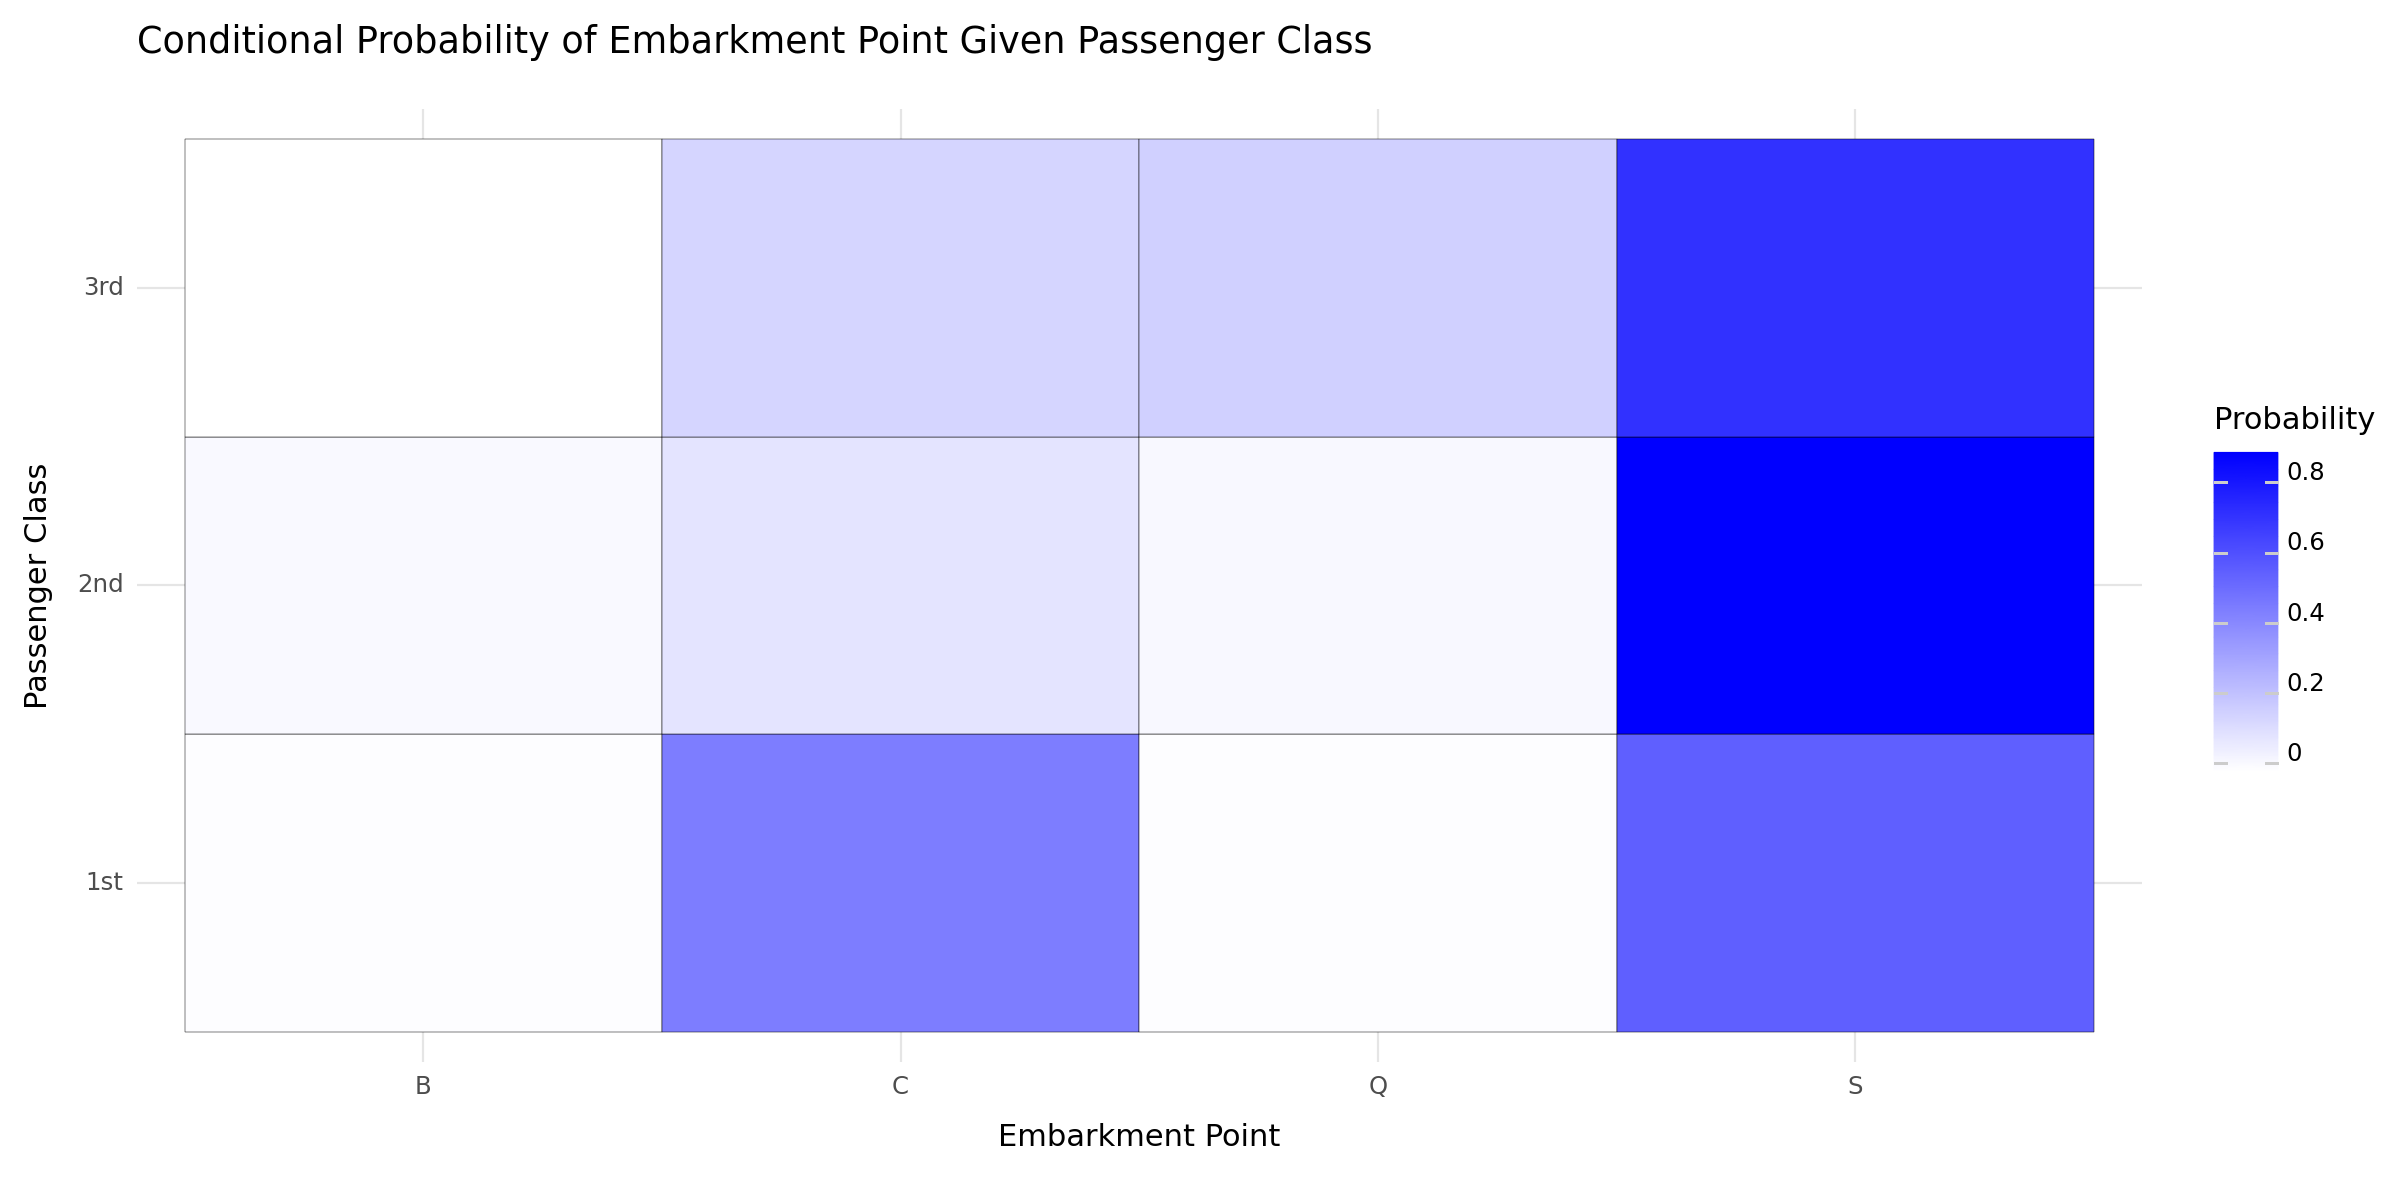

<Figure Size: (1200 x 600)>

In [ ]:
p9.options.figure_size = (12, 6)
(p9.ggplot(long_condition_class_given,
  p9.aes(
      x='embarked',
      y='class'
      ))
+ p9.geom_tile(p9.aes(fill="probability"), colour="black")
+ p9.scale_fill_gradient(low="white", high="blue")
+ p9.theme_minimal()
+ p9.labs(title="Conditional Probability of Embarkment Point Given Passenger Class",
         x="Embarkment Point",
         y="Passenger Class",
         fill="Probability")
)

In [ ]:
# Code here
long_condition_embarked_given = condition_embarked_given.reset_index().melt(id_vars="class", var_name = "embarked", value_name= "probability")
long_condition_embarked_given

,class,embarked,probability
0,1st,B,0.333333
1,2nd,B,0.666667
2,3rd,B,0.000000
3,1st,C,0.527675
4,2nd,C,0.095941
5,3rd,C,0.376384
6,1st,Q,0.024390
7,2nd,Q,0.056911
8,3rd,Q,0.918699
9,1st,S,0.191466


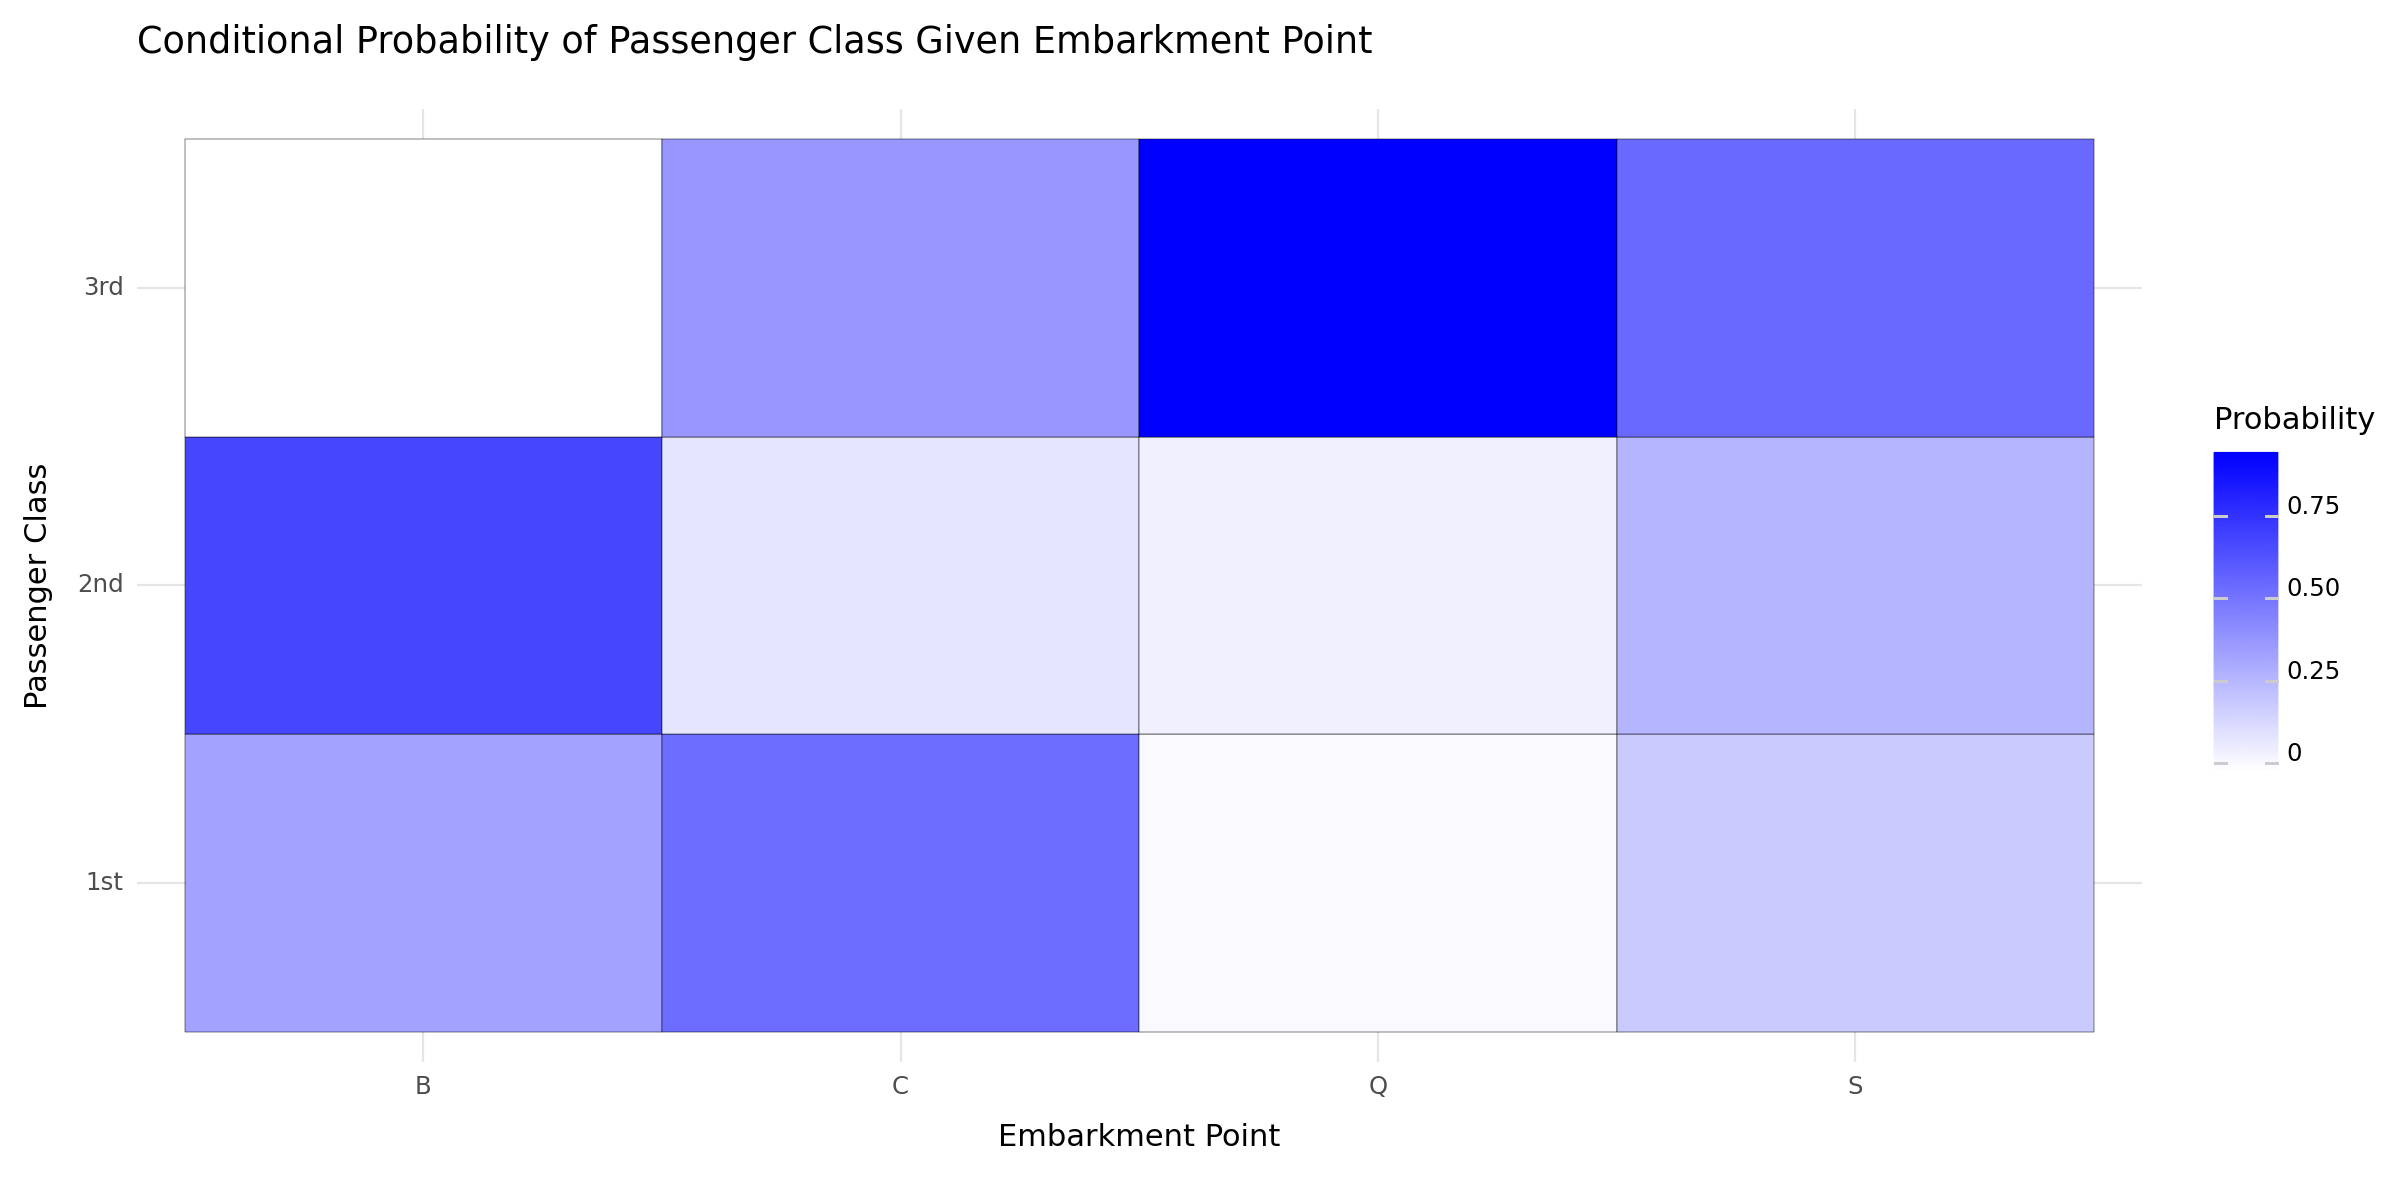

<Figure Size: (1200 x 600)>

In [ ]:
p9.options.figure_size = (12, 6)
(p9.ggplot(long_condition_embarked_given,
  p9.aes(
      x='embarked',
      y='class'
      ))
+ p9.geom_tile(p9.aes(fill="probability"), colour="black")
+ p9.scale_fill_gradient(low="white", high="blue")
+ p9.theme_minimal()
+ p9.labs(title="Conditional Probability of Passenger Class Given Embarkment Point",
         x="Embarkment Point",
         y="Passenger Class",
         fill="Probability")
)


While a heatmap conveys the same information as the cross tabbed table above, it does so in a less interpretable manner. The key for the fill color leaves a lot of room for guessing, meaning that it is unclear the exact probability just by looking at the shade of color on that tile of the graph. Also, without a clear graph title, it is easily misinterpretable what conditional distribution is being shown as the axes and color scale are the same.

Citations:
https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_tile.html
